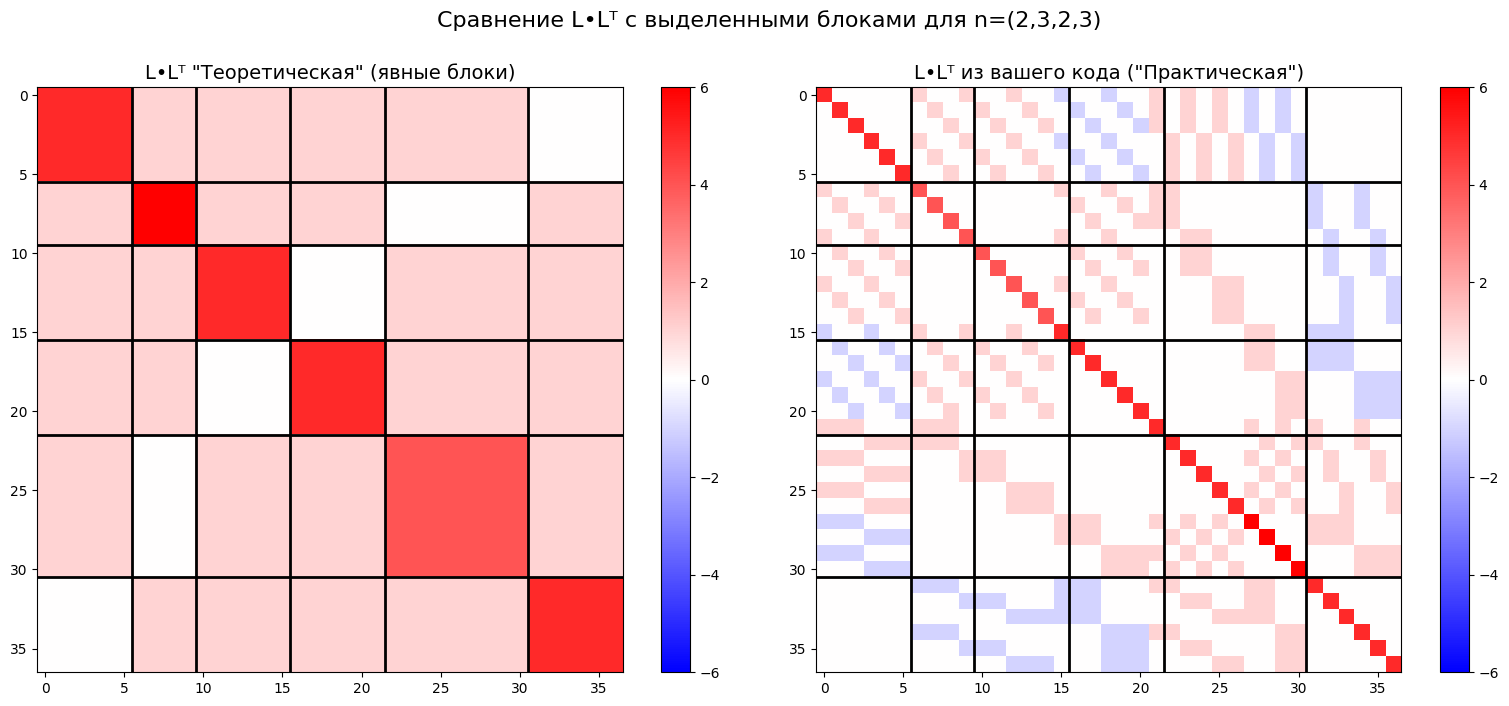

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# --- Теоретическая L•Lᵀ (с явным определением блоков) ---
def build_M_theoretical_explicit(n1, n2, n3, n4):
    dims = {'d1': n1*n2, 'd2': n1*n3, 'd3': n1*n4, 'd4': n2*n3, 'd5': n2*n4, 'd6': n3*n4}
    block_1_1 = (n3 + n4) * np.ones((dims['d1'], dims['d1'])); block_1_2 = np.ones((dims['d1'], dims['d2'])); block_1_3 = np.ones((dims['d1'], dims['d3'])); block_1_4 = np.ones((dims['d1'], dims['d4'])); block_1_5 = np.ones((dims['d1'], dims['d5'])); block_1_6 = np.zeros((dims['d1'], dims['d6']))
    block_2_1 = np.ones((dims['d2'], dims['d1'])); block_2_2 = (n2 + n4) * np.ones((dims['d2'], dims['d2'])); block_2_3 = np.ones((dims['d2'], dims['d3'])); block_2_4 = np.ones((dims['d2'], dims['d4'])); block_2_5 = np.zeros((dims['d2'], dims['d5'])); block_2_6 = np.ones((dims['d2'], dims['d6']))
    block_3_1 = np.ones((dims['d3'], dims['d1'])); block_3_2 = np.ones((dims['d3'], dims['d2'])); block_3_3 = (n2 + n3) * np.ones((dims['d3'], dims['d3'])); block_3_4 = np.zeros((dims['d3'], dims['d4'])); block_3_5 = np.ones((dims['d3'], dims['d5'])); block_3_6 = np.ones((dims['d3'], dims['d6']))
    block_4_1 = np.ones((dims['d4'], dims['d1'])); block_4_2 = np.ones((dims['d4'], dims['d2'])); block_4_3 = np.zeros((dims['d4'], dims['d3'])); block_4_4 = (n1 + n4) * np.ones((dims['d4'], dims['d4'])); block_4_5 = np.ones((dims['d4'], dims['d5'])); block_4_6 = np.ones((dims['d4'], dims['d6']))
    block_5_1 = np.ones((dims['d5'], dims['d1'])); block_5_2 = np.zeros((dims['d5'], dims['d2'])); block_5_3 = np.ones((dims['d5'], dims['d3'])); block_5_4 = np.ones((dims['d5'], dims['d4'])); block_5_5 = (n1 + n3) * np.ones((dims['d5'], dims['d5'])); block_5_6 = np.ones((dims['d5'], dims['d6']))
    block_6_1 = np.zeros((dims['d6'], dims['d1'])); block_6_2 = np.ones((dims['d6'], dims['d2'])); block_6_3 = np.ones((dims['d6'], dims['d3'])); block_6_4 = np.ones((dims['d6'], dims['d4'])); block_6_5 = np.ones((dims['d6'], dims['d5'])); block_6_6 = (n1 + n2) * np.ones((dims['d6'], dims['d6']))
    M_explicit = np.block([
        [block_1_1, block_1_2, block_1_3, block_1_4, block_1_5, block_1_6],
        [block_2_1, block_2_2, block_2_3, block_2_4, block_2_5, block_2_6],
        [block_3_1, block_3_2, block_3_3, block_3_4, block_3_5, block_3_6],
        [block_4_1, block_4_2, block_4_3, block_4_4, block_4_5, block_4_6],
        [block_5_1, block_5_2, block_5_3, block_5_4, block_5_5, block_5_6],
        [block_6_1, block_6_2, block_6_3, block_6_4, block_6_5, block_6_6],
    ])
    return M_explicit

# --- Практическая реализация (ваш код) ---
def build_L_practical(n_1=1, n1=2, n2=3, n3=4, n4=5):
    # ... (код вашей функции build_L_matrix)
    z1_blocks = [-np.kron(np.ones((n_1, n2)), np.eye(n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n3*n4)), np.zeros((n3*n4, n1*n2*n4 + n1*n2*n3))]
    z_1 = np.hstack(z1_blocks)
    z2_blocks = [-np.kron(np.kron(np.eye(n2), np.ones((n_1, n3))), np.eye(n4)), np.zeros((n2*n4, n1*n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n4)), np.zeros((n2*n4, n1*n2*n3))]
    z_2 = np.hstack(z2_blocks)
    z3_blocks = [np.zeros((n1*n4, n2*n3*n4)), -np.kron(np.kron(np.eye(n1), np.ones((n_1, n3))), np.eye(n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n4)), np.zeros((n1*n4, n1*n2*n3))]
    z_3 = np.hstack(z3_blocks)
    z4_blocks = [-np.kron(np.eye(n2*n3), np.ones((n_1, n4))), np.zeros((n2*n3, n1*n3*n4 + n1*n2*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n3))]
    z_4 = np.hstack(z4_blocks)
    z5_blocks = [np.zeros((n1*n3, n2*n3*n4)), -np.kron(np.eye(n1*n3), np.ones((n_1, n4))), np.zeros((n1*n3, n1*n2*n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n3))]
    z_5 = np.hstack(z5_blocks)
    z6_blocks = [np.zeros((n1*n2, n2*n3*n4 + n1*n3*n4)), -np.kron(np.eye(n1*n2), np.ones((n_1, n4))), np.kron(np.eye(n1*n2), np.ones((n_1, n3)))]
    z_6 = np.hstack(z6_blocks)
    L = np.vstack([z_1, z_2, z_3, z_4, z_5, z_6])
    return L

def plot_LLT_comparison_with_blocks(n1, n2, n3, n4):
    """Строит 2 графика L•Lᵀ для сравнения с выделенными блоками."""
    M_theo = build_M_theoretical_explicit(n1, n2, n3, n4)

    L_prac = build_L_practical(n_1=1, n1=n1, n2=n2, n3=n3, n4=n4)
    M_prac = L_prac @ L_prac.T

    # --- Вычисление границ блоков ---
    n = {1: n1, 2: n2, 3: n3, 4: n4}
    pairs = sorted([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])
    dims = {p: n[p[0]] * n[p[1]] for p in pairs}
    block_sizes = [dims[p] for p in pairs]
    block_boundaries = np.cumsum(block_sizes)[:-1]

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Сравнение L•Lᵀ с выделенными блоками для n=({n1},{n2},{n3},{n4})', fontsize=16)

    def draw(ax, matrix, title, boundaries):
        v_max = np.max(matrix)
        v_min = np.min(matrix)
        # Центрируем палитру относительно нуля
        v_abs_max = max(abs(v_max), abs(v_min))
        c = ax.imshow(matrix, cmap='bwr', vmin=-v_abs_max, vmax=v_abs_max)
        fig.colorbar(c, ax=ax)
        ax.set_title(title, fontsize=14)
        ax.grid(False)
        # --- Рисование границ ---
        for b in boundaries:
            ax.axvline(x=b - 0.5, color='black', linewidth=2, linestyle='-')
            ax.axhline(y=b - 0.5, color='black', linewidth=2, linestyle='-')

    draw(axes[0], M_theo, 'L•Lᵀ "Теоретическая" (явные блоки)', block_boundaries)
    draw(axes[1], M_prac, 'L•Lᵀ из вашего кода ("Практическая")', block_boundaries)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- ЗАПУСК ДЛЯ СЛУЧАЯ 2 ---
plot_LLT_comparison_with_blocks(n1=2, n2=3, n3=2, n4=3)

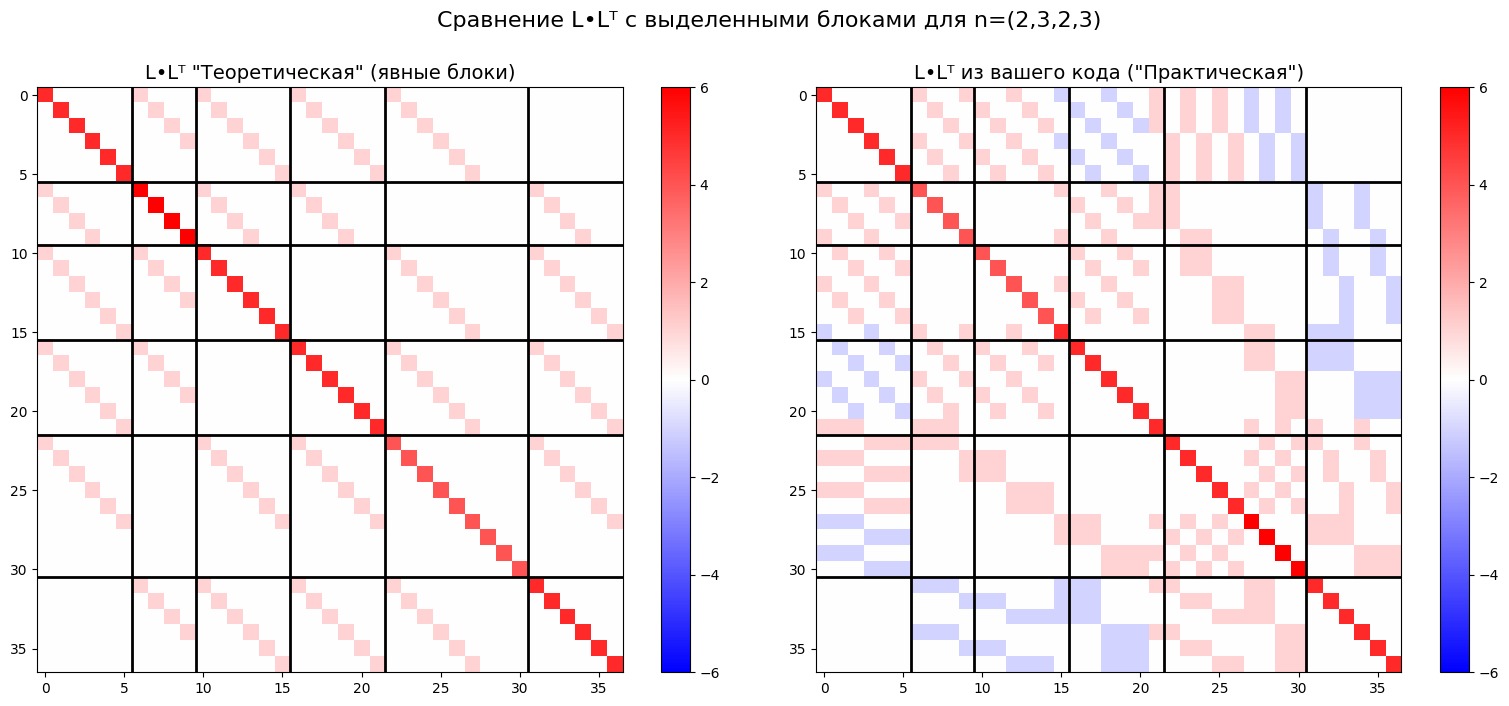

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Теоретическая L•Lᵀ (с явным определением блоков) ---
def build_M_theoretical_explicit(n1, n2, n3, n4):
    dims = {'d1': n1*n2, 'd2': n1*n3, 'd3': n1*n4, 'd4': n2*n3, 'd5': n2*n4, 'd6': n3*n4}
    block_1_1 = (n2 + n1) * np.eye(dims['d1']); block_1_2 = np.eye(dims['d1'], dims['d2']); block_1_3 = np.eye(dims['d1'], dims['d3']); block_1_4 = np.eye(dims['d1'], dims['d4']); block_1_5 = np.eye(dims['d1'], dims['d5']); block_1_6 = np.zeros((dims['d1'], dims['d6']))
    block_2_1 = np.eye(dims['d2'], dims['d1']); block_2_2 = (n2 + n4) * np.eye(dims['d2']); block_2_3 = np.eye(dims['d2'], dims['d3']); block_2_4 = np.eye(dims['d2'], dims['d4']); block_2_5 = np.zeros((dims['d2'], dims['d5'])); block_2_6 = np.eye(dims['d2'], dims['d6'])
    block_3_1 = np.eye(dims['d3'], dims['d1']); block_3_2 = np.eye(dims['d3'], dims['d2']); block_3_3 = (n2 + n3) * np.eye(dims['d3']); block_3_4 = np.zeros((dims['d3'], dims['d4'])); block_3_5 = np.eye(dims['d3'], dims['d5']); block_3_6 = np.eye(dims['d3'], dims['d6'])
    block_4_1 = np.eye(dims['d4'], dims['d1']); block_4_2 = np.eye(dims['d4'], dims['d2']); block_4_3 = np.zeros((dims['d4'], dims['d3'])); block_4_4 = (n1 + n4) * np.eye(dims['d4']); block_4_5 = np.eye(dims['d4'], dims['d5']); block_4_6 = np.eye(dims['d4'], dims['d6'])
    block_5_1 = np.eye(dims['d5'], dims['d1']); block_5_2 = np.zeros((dims['d5'], dims['d2'])); block_5_3 = np.eye(dims['d5'], dims['d3']); block_5_4 = np.eye(dims['d5'], dims['d4']); block_5_5 = (n1 + n3) * np.eye(dims['d5']); block_5_6 = np.eye(dims['d5'], dims['d6'])
    block_6_1 = np.zeros((dims['d6'], dims['d1'])); block_6_2 = np.eye(dims['d6'], dims['d2']); block_6_3 = np.eye(dims['d6'], dims['d3']); block_6_4 = np.eye(dims['d6'], dims['d4']); block_6_5 = np.eye(dims['d6'], dims['d5']); block_6_6 = (n1 + n2) * np.eye(dims['d6'])
    M_explicit = np.block([
        [block_1_1, block_1_2, block_1_3, block_1_4, block_1_5, block_1_6],
        [block_2_1, block_2_2, block_2_3, block_2_4, block_2_5, block_2_6],
        [block_3_1, block_3_2, block_3_3, block_3_4, block_3_5, block_3_6],
        [block_4_1, block_4_2, block_4_3, block_4_4, block_4_5, block_4_6],
        [block_5_1, block_5_2, block_5_3, block_5_4, block_5_5, block_5_6],
        [block_6_1, block_6_2, block_6_3, block_6_4, block_6_5, block_6_6],
    ])
    return M_explicit

# --- Практическая реализация (ваш код) ---
def build_L_practical(n_1=1, n1=2, n2=3, n3=4, n4=5):
    # ... (код вашей функции build_L_matrix)
    z1_blocks = [-np.kron(np.ones((n_1, n2)), np.eye(n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n3*n4)), np.zeros((n3*n4, n1*n2*n4 + n1*n2*n3))]
    z_1 = np.hstack(z1_blocks)
    z2_blocks = [-np.kron(np.kron(np.eye(n2), np.ones((n_1, n3))), np.eye(n4)), np.zeros((n2*n4, n1*n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n4)), np.zeros((n2*n4, n1*n2*n3))]
    z_2 = np.hstack(z2_blocks)
    z3_blocks = [np.zeros((n1*n4, n2*n3*n4)), -np.kron(np.kron(np.eye(n1), np.ones((n_1, n3))), np.eye(n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n4)), np.zeros((n1*n4, n1*n2*n3))]
    z_3 = np.hstack(z3_blocks)
    z4_blocks = [-np.kron(np.eye(n2*n3), np.ones((n_1, n4))), np.zeros((n2*n3, n1*n3*n4 + n1*n2*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n3))]
    z_4 = np.hstack(z4_blocks)
    z5_blocks = [np.zeros((n1*n3, n2*n3*n4)), -np.kron(np.eye(n1*n3), np.ones((n_1, n4))), np.zeros((n1*n3, n1*n2*n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n3))]
    z_5 = np.hstack(z5_blocks)
    z6_blocks = [np.zeros((n1*n2, n2*n3*n4 + n1*n3*n4)), -np.kron(np.eye(n1*n2), np.ones((n_1, n4))), np.kron(np.eye(n1*n2), np.ones((n_1, n3)))]
    z_6 = np.hstack(z6_blocks)
    L = np.vstack([z_1, z_2, z_3, z_4, z_5, z_6])
    return L

def plot_LLT_comparison_with_blocks(n1, n2, n3, n4):
    """Строит 2 графика L•Lᵀ для сравнения с выделенными блоками."""
    M_theo = build_M_theoretical_explicit(n1, n2, n3, n4)

    L_prac = build_L_practical(n_1=1, n1=n1, n2=n2, n3=n3, n4=n4)
    M_prac = L_prac @ L_prac.T

    # --- Вычисление границ блоков ---
    n = {1: n1, 2: n2, 3: n3, 4: n4}
    pairs = sorted([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])
    dims = {p: n[p[0]] * n[p[1]] for p in pairs}
    block_sizes = [dims[p] for p in pairs]
    block_boundaries = np.cumsum(block_sizes)[:-1]

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Сравнение L•Lᵀ с выделенными блоками для n=({n1},{n2},{n3},{n4})', fontsize=16)

    def draw(ax, matrix, title, boundaries):
        v_max = np.max(matrix)
        v_min = np.min(matrix)
        # Центрируем палитру относительно нуля
        v_abs_max = max(abs(v_max), abs(v_min))
        c = ax.imshow(matrix, cmap='bwr', vmin=-v_abs_max, vmax=v_abs_max)
        fig.colorbar(c, ax=ax)
        ax.set_title(title, fontsize=14)
        ax.grid(False)
        # --- Рисование границ ---
        for b in boundaries:
            ax.axvline(x=b - 0.5, color='black', linewidth=2, linestyle='-')
            ax.axhline(y=b - 0.5, color='black', linewidth=2, linestyle='-')

    draw(axes[0], M_theo, 'L•Lᵀ "Теоретическая" (явные блоки)', block_boundaries)
    draw(axes[1], M_prac, 'L•Lᵀ из вашего кода ("Практическая")', block_boundaries)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- ЗАПУСК ДЛЯ СЛУЧАЯ 2 ---
plot_LLT_comparison_with_blocks(n1=2, n2=3, n3=2, n4=3)

Размерности блоков (строки x столбцы):
  d1: 35
  d2: 21
  d3: 14
  d4: 15
  d5: 10
  d6: 6
Общее количество столбцов: 101
Размерности row1 блоков: (35, 35), (35, 21), (35, 14), (35, 15), (35, 10), (35, 6)
Размерности row2 блоков: (21, 35), (21, 21), (21, 14), (21, 15), (21, 10), (21, 6)
Размерности row3 блоков: (14, 35), (14, 21), (14, 14), (14, 15), (14, 10), (14, 6)
Размерности row4 блоков: (15, 35), (15, 21), (15, 14), (15, 15), (15, 10), (15, 6)
Размерности row5 блоков: (10, 35), (10, 21), (10, 14), (10, 15), (10, 10), (10, 6)
Размерности row6 блоков: (6, 35), (6, 21), (6, 14), (6, 15), (6, 10), (6, 6)


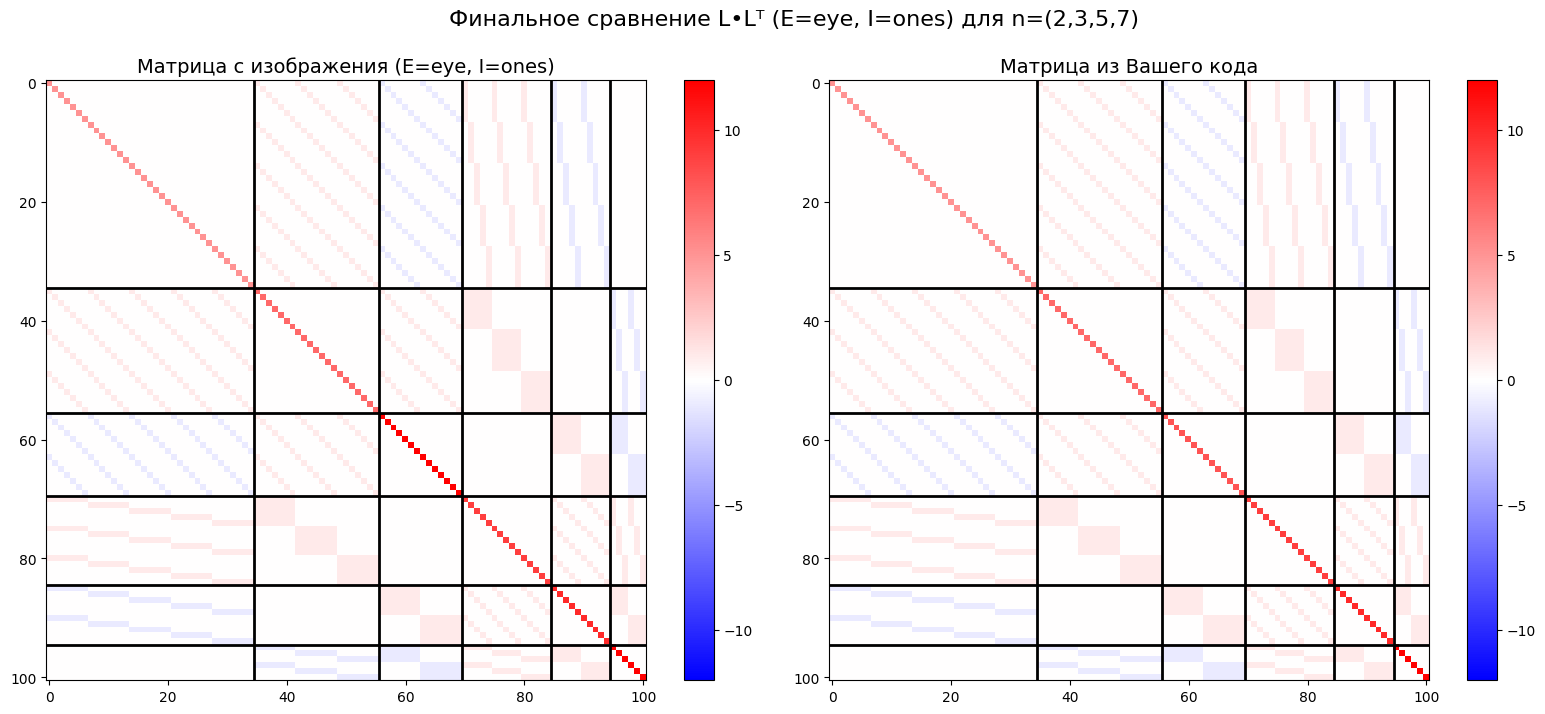

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Практическая реализация (ваш код) ---
def build_L_practical(n_1=1, n1=2, n2=3, n3=4, n4=5):
    # ... (код вашей функции build_L_matrix)
    z1_blocks = [-np.kron(np.ones((n_1, n2)), np.eye(n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n3*n4)), np.zeros((n3*n4, n1*n2*n4 + n1*n2*n3))]
    z_1 = np.hstack(z1_blocks)
    z2_blocks = [-np.kron(np.kron(np.eye(n2), np.ones((n_1, n3))), np.eye(n4)), np.zeros((n2*n4, n1*n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n4)), np.zeros((n2*n4, n1*n2*n3))]
    z_2 = np.hstack(z2_blocks)
    z3_blocks = [np.zeros((n1*n4, n2*n3*n4)), -np.kron(np.kron(np.eye(n1), np.ones((n_1, n3))), np.eye(n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n4)), np.zeros((n1*n4, n1*n2*n3))]
    z_3 = np.hstack(z3_blocks)
    z4_blocks = [-np.kron(np.eye(n2*n3), np.ones((n_1, n4))), np.zeros((n2*n3, n1*n3*n4 + n1*n2*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n3))]
    z_4 = np.hstack(z4_blocks)
    z5_blocks = [np.zeros((n1*n3, n2*n3*n4)), -np.kron(np.eye(n1*n3), np.ones((n_1, n4))), np.zeros((n1*n3, n1*n2*n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n3))]
    z_5 = np.hstack(z5_blocks)
    z6_blocks = [np.zeros((n1*n2, n2*n3*n4 + n1*n3*n4)), -np.kron(np.eye(n1*n2), np.ones((n_1, n4))), np.kron(np.eye(n1*n2), np.ones((n_1, n3)))]
    z_6 = np.hstack(z6_blocks)
    L = np.vstack([z_1, z_2, z_3, z_4, z_5, z_6])
    return L

# --- L•Lᵀ с изображения (интерпретация: E=eye, I=ones) ---
def build_M_from_image_swapped(n1, n2, n3, n4):
    """
    Строит матрицу L•Lᵀ по изображению с инвертированной нотацией.
    """
    # Исправленные размерности блоков
    dims = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    total_cols = sum(dims)


    # Новая интерпретация: E - единичная, I - из единиц
    def E(n): return np.eye(n)
    def I(shape): return np.ones(shape)
    def Z(shape): return np.zeros(shape)

    print(f"Размерности блоков (строки x столбцы):")
    print(f"  d1: {dims[0]}")
    print(f"  d2: {dims[1]}")
    print(f"  d3: {dims[2]}")
    print(f"  d4: {dims[3]}")
    print(f"  d5: {dims[4]}")
    print(f"  d6: {dims[5]}")
    print(f"Общее количество столбцов: {total_cols}")

    # --- Блочная строка 1 (размерность: dims[0] x total_cols) ---
    block_1_1 = (n2+n1)*np.kron(E(n3),E(n4)); block_1_2 = np.kron(I((n3,n2)), E(n4)); block_1_3 = -np.kron(I((n3,n1)),E(n4)); block_1_4 = np.kron(np.kron(I((1,n2)),E(n3)), I((n4,1))); block_1_5 = -np.kron(np.kron(I((1,n1)),E(n3)), I((n4, 1))); block_1_6 = Z((n3*n4, n1*n2))
    row1 = [ block_1_1, block_1_2, block_1_3, block_1_4, block_1_5, block_1_6 ]
    print(f"Размерности row1 блоков: {block_1_1.shape}, {block_1_2.shape}, {block_1_3.shape}, {block_1_4.shape}, {block_1_5.shape}, {block_1_6.shape}")

    # # --- Блочная строка 2 (размерность: dims[1] x total_cols) ---
    block_2_1 = np.kron(I((n2,n3)),E(n4)); block_2_2 = (n3+n1)*np.kron(E(n2),E(n4)); block_2_3 = np.kron(I((n2,n1)),E(n4)); block_2_4 = np.kron(E(n2),I((n4,n3))); block_2_5 = Z((n2*n4,n1*n3)); block_2_6 = np.kron(-np.kron(I((1,n1)),E(n2)), I((n4,1)))
    row2 = [ block_2_1, block_2_2, block_2_3, block_2_4, block_2_5, block_2_6 ]
    print(f"Размерности row2 блоков: {block_2_1.shape}, {block_2_2.shape}, {block_2_3.shape}, {block_2_4.shape}, {block_2_5.shape}, {block_2_6.shape}")

    # # --- Блочная строка 3 (размерность: dims[2] x total_cols) ---
    block_3_1 = -np.kron(I((n1, n3)),E(n4)); block_3_2 = np.kron(I((n1,n2)),E(n4)); block_3_3 = (n3+n4)*np.kron(E(n1),E(n4)); block_3_4 = Z((n1*n4,n2*n3)); block_3_5 = np.kron(E(n1), I((n4, n3))); block_3_6 = -np.kron(E(n1), I((n4, n2)))
    row3 = [ block_3_1, block_3_2, block_3_3, block_3_4, block_3_5, block_3_6 ]
    print(f"Размерности row3 блоков: {block_3_1.shape}, {block_3_2.shape}, {block_3_3.shape}, {block_3_4.shape}, {block_3_5.shape}, {block_3_6.shape}")

    # # --- Блочная строка 4 (размерность: dims[3] x total_cols) ---
    block_4_1 = np.kron(np.kron(I((n2,1)),E(n3)), I((1, n4))); block_4_2 = np.kron(E(n2), I((n3,n4))); block_4_3 = Z((n2*n3,n1*n4)); block_4_4 = (n1+n4)*np.kron(E(n2),E(n3)); block_4_5 = np.kron(I((n2,n1)),E(n3)); block_4_6 = np.kron(np.kron(I((1, n1)), E(n2)), I((n3, 1)))
    row4 = [ block_4_1, block_4_2, block_4_3, block_4_4, block_4_5, block_4_6 ]
    print(f"Размерности row4 блоков: {block_4_1.shape}, {block_4_2.shape}, {block_4_3.shape}, {block_4_4.shape}, {block_4_5.shape}, {block_4_6.shape}")

    # # --- Блочная строка 5 (размерность: dims[4] x total_cols) ---
    block_5_1 = -np.kron(np.kron(I((n1,1)),E(n3)), I((1, n4))); block_5_2 = Z((n1*n3, n2*n4)); block_5_3 = np.kron(E(n1), I((n3, n4))); block_5_4 = np.kron(I((n1, n2)),E(n3)); block_5_5 = (n2+n4)*np.kron(E(n1),E(n3)); block_5_6 = np.kron(E(n1), I((n3, n2)))
    row5 = [ block_5_1, block_5_2, block_5_3, block_5_4, block_5_5, block_5_6 ]
    print(f"Размерности row5 блоков: {block_5_1.shape}, {block_5_2.shape}, {block_5_3.shape}, {block_5_4.shape}, {block_5_5.shape}, {block_5_6.shape}")

    # # --- Блочная строка 6 (размерность: dims[5] x total_cols) ---
    block_6_1 = Z((n1 * n2, n3 * n4)); block_6_2 = -np.kron(np.kron(I((n1, 1)),E(n2)), I((1, n4))); block_6_3 = -np.kron(E(n1), I((n2, n4))); block_6_4 = np.kron(np.kron(I((n1,1)),E(n2)), I((1, n3))); block_6_5 = np.kron(E(n1), I((n2,n3))); block_6_6 = (n4+n3)*np.kron(E(n1),E(n2))
    row6 = [ block_6_1, block_6_2, block_6_3, block_6_4, block_6_5, block_6_6 ]
    print(f"Размерности row6 блоков: {block_6_1.shape}, {block_6_2.shape}, {block_6_3.shape}, {block_6_4.shape}, {block_6_5.shape}, {block_6_6.shape}")


    #M_swapped = np.block([row1, row2, row3, row4, row5, row6])
    #return M_swapped
    return np.block([row1, row2, row3, row4, row5, row6])

def plot_LLT_comparison_with_blocks(n1, n2, n3, n4):
    M_image_swapped = build_M_from_image_swapped(n1, n2, n3, n4)
    L_prac = build_L_practical(n_1=1, n1=n1, n2=n2, n3=n3, n4=n4)
    M_prac = L_prac @ L_prac.T

    block_sizes = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    block_boundaries = np.cumsum(block_sizes)[:-1]

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Финальное сравнение L•Lᵀ (E=eye, I=ones) для n=({n1},{n2},{n3},{n4})', fontsize=16)

    def draw(ax, matrix, title, boundaries):
        v_max = np.max(matrix); v_min = np.min(matrix)
        v_abs_max = max(abs(v_max), abs(v_min))
        c = ax.imshow(matrix, cmap='bwr', vmin=-v_abs_max, vmax=v_abs_max)
        fig.colorbar(c, ax=ax)
        ax.set_title(title, fontsize=14)
        ax.grid(False)
        for b in boundaries:
            ax.axvline(x=b - 0.5, color='black', linewidth=2, linestyle='-')
            ax.axhline(y=b - 0.5, color='black', linewidth=2, linestyle='-')

    draw(axes[0], M_image_swapped, 'Матрица с изображения (E=eye, I=ones)', block_boundaries)
    draw(axes[1], M_prac, 'Матрица из Вашего кода', block_boundaries)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- ЗАПУСК ---
plot_LLT_comparison_with_blocks(n1=2, n2=3, n3=5, n4=7)

[[ 2.  2.  2.  2.  0.  0.  0.  0. -2. -2. -2. -2.  0.  0.  0.  0. -2. -2.
  -2. -2.  0.  0.  0.  0.]]


In [ ]:
print((LLT @ V1.T).transpose())

NameError: name 'LLT' is not defined

In [ ]:
def Q(n):
  return np.vstack([np.ones((1, n-1)), -np.eye(n-1)])

def eig2(n1, n2, n3, n4):
  Qn4 = Q(n4)
  v2_1 = np.hstack([np.kron(n1*np.ones((n3, 1)), Qn4), np.ones((n2*n4, n4 - 1)), np.zeros((n1*n3, n4-1)), np.zeros((n1*n2, n4-1))]).transpose()
  v2_2 =
  lambda2 = n1 + n2 + n3
  lambda2_kratn = 2 * (n4 -1)
  return lambda2, [v2_1, v2_2], lambda2_kratn



n_1 = 1
n1 = 2
n2 = 2
n3 = 2
n4 = 2
L_prac = build_L_practical(n_1=n_1, n1=n1, n2=n2, n3=n3, n4=n4)
M_prac = L_prac @ L_prac.T

v2_1 = generate_eigenvectors(n1, n2, n3, n4)
is_igenvector = np.isclose(M_prac @ v2_1, v2_1)
print(is_igenvector)
#

SyntaxError: invalid syntax (ipython-input-1485841297.py, line 7)

In [ ]:
def eig1(n1, n2, n3, n4):
    """
    Возвращает аналитическое решение для собственного числа λ = n₁+n₂+n₃+n₄
    для матрицы L•Lᵀ, построенной из вашего программного кода.

    Аргументы:
        n1, n2, n3, n4 (int): Параметры размерности.

    Возвращает:
        tuple: (lambda_val, eigenvectors, multiplicity)
            - lambda_val (int): Собственное число.
            - eigenvectors (list): Список из 3-х numpy-векторов, образующих базис.
            - multiplicity (int): Геометрическая кратность собственного числа.
    """
    # --- 1. Определение собственного числа и кратности ---
    lambda_val = n1 + n2 + n3 + n4
    multiplicity = 3

    # --- 2. Функция для построения блочных векторов ---
    def create_block_vector(coeffs):
        # Определяем порядок и размеры блоков, как в вашем коде
        dims = {'{3,4}': n3*n4, '{2,4}': n2*n4, '{1,4}': n1*n4, '{2,3}': n2*n3, '{1,3}': n1*n3, '{1,2}': n1*n2}
        block_order = ['{3,4}', '{2,4}', '{1,4}', '{2,3}', '{1,3}', '{1,2}']
        total_dim = sum(dims.values())
        offsets = np.cumsum([0] + [dims[k] for k in block_order])

        v = np.zeros((total_dim, 1))
        for i, key in enumerate(block_order):
            if key in coeffs:
                start, end = offsets[i], offsets[i+1]
                # Заполняем блок вектором из единиц, умноженным на коэффициент
                v[start:end] = coeffs[key] * np.ones((end - start, 1))
        return v

    # --- 3. Определение коэффициентов для каждого из 3-х векторов ---
    # Коэффициенты, выведенные из упрощенного численного базиса
    coeffs1 = {'{3,4}': n1, '{1,4}': -n3, '{1,3}': -n4}
    coeffs2 = {'{2,4}': n1, '{1,4}': n2, '{1,2}': -n4}
    coeffs3 = {'{2,3}': n1, '{1,3}': n2, '{1,2}': n3}

    # --- 4. Построение векторов ---
    v1 = create_block_vector(coeffs1)
    v2 = create_block_vector(coeffs2)
    v3 = create_block_vector(coeffs3)

    eigenvectors = [v1, v2, v3]

    return lambda_val, eigenvectors, multiplicity

# --- Вспомогательные функции ---

def Q_star(n):
    """
    Создает матрицу Q*_n размера n x (n-1) в соответствии с формулой.
    """
    if n <= 1:
        # При n<=1 кратность будет <= 0, поэтому векторное пространство пусто.
        # Возвращаем пустую матрицу с n строками.
        return np.empty((n, 0))
    # Создаем единичную матрицу размера (n-1)x(n-1)
    i_n_minus_1 = np.identity(n - 1)
    # Создаем строку из -1 длиной (n-1)
    neg_e_row = -np.ones((1, n - 1))
    # Объединяем их вертикально
    return np.vstack([i_n_minus_1, neg_e_row])

def E(n):
    """
    Создает вектор-столбец из единиц размера n x 1.
    """
    return np.ones((n, 1))

# --- Функции для генерации собственных векторов и значений ---

def eig2(n1, n2, n3, n4):
  """
  Собственное значение λ = n1 + n2 + n3
  """
  lambda_val = n1 + n2 + n3
  multiplicity = 2 * (n4 - 1)

  # Проверка, имеет ли смысл вычисление (при n4 > 1)
  if n4 <= 1:
      return lambda_val, [], multiplicity

  # --- Первый набор собственных векторов v2_1 ---
  # Не-нулевые блоки: 1-й и 3-й
  b1 = n1 * np.kron(E(n3), Q_star(n4))
  b2 = np.zeros((n2 * n4, n4 - 1))
  b3 = n3 * np.kron(E(n1), Q_star(n4))
  b4 = np.zeros((n2 * n3, n4 - 1))
  b5 = np.zeros((n1 * n3, n4 - 1))
  b6 = np.zeros((n1 * n2, n4 - 1))
  v2_1 = np.vstack([b1, b2, b3, b4, b5, b6])

  # --- Второй набор собственных векторов v2_2 ---
  # Не-нулевые блоки: 2-й и 3-й
  b1 = np.zeros((n3 * n4, n4 - 1))
  b2 = n1 * np.kron(E(n2), Q_star(n4))
  b3 = n2 * np.kron(E(n1), Q_star(n4))
  # b4, b5, b6 остаются нулевыми
  v2_2 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v2_1, v2_2], multiplicity

def eig3(n1, n2, n3, n4):
  """
  Собственное значение λ = n1 + n2 + n4
  """
  lambda_val = n1 + n2 + n4
  multiplicity = 2 * (n3 - 1)

  if n3 <= 1:
      return lambda_val, [], multiplicity

  # --- Первый набор собственных векторов v3_1 ---
  # Не-нулевые блоки: 4-й и 5-й
  b1 = np.zeros((n3 * n4, n3 - 1))
  b2 = np.zeros((n2 * n4, n3 - 1))
  b3 = np.zeros((n1 * n4, n3 - 1))
  b4 = n1 * np.kron(E(n2), Q_star(n3))
  b5 = n2 * np.kron(E(n1), Q_star(n3))
  b6 = np.zeros((n1 * n2, n3 - 1))
  v3_1 = np.vstack([b1, b2, b3, b4, b5, b6])

  # --- Второй набор собственных векторов v3_2 ---
  # Не-нулевые блоки: 1-й и 3-й (согласно формуле)
  b1 = n2 * np.kron(Q_star(n3), E(n4))
  b2 = np.zeros((n2 * n4, n3 - 1))
  b3 = n4 * np.kron(Q_star(n3), E(n1))
  b4 = np.zeros((n2 * n3, n3 - 1))
  b5 = np.zeros((n1 * n3, n3 - 1))
  b6 = np.zeros((n1 * n2, n3 - 1))
  v3_2 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v3_1, v3_2], multiplicity

def eig4(n1, n2, n3, n4):
  """
  Собственное значение λ = n1 + n3 + n4
  """
  lambda_val = n1 + n3 + n4
  multiplicity = 2 * (n2 - 1)

  if n2 <= 1:
    return lambda_val, [], multiplicity

  # --- Первый набор собственных векторов v4_1 ---
  # Не-нулевые блоки: 2-й и 3-й
  b1 = np.zeros((n3 * n4, n2 - 1))
  b2 = n3 * np.kron(Q_star(n2), E(n4))
  b3 = n4 * np.kron(Q_star(n2), E(n3))
  b4 = np.zeros((n2 * n3, n2 - 1))
  b5 = np.zeros((n1 * n3, n2 - 1))
  b6 = np.zeros((n1 * n2, n2 - 1))
  v4_1 = np.vstack([b1, b2, b3, b4, b5, b6])

  # --- Второй набор собственных векторов v4_2 ---
  # Не-нулевые блоки: 5-й и 6-й
  b1 = np.zeros((n3 * n4, n2 - 1))
  b2 = np.zeros((n2 * n4, n2 - 1))
  b3 = np.zeros((n1 * n4, n2 - 1))
  b4 = np.zeros((n2 * n3, n2 - 1))
  b5 = n3 * np.kron(E(n1), Q_star(n2))
  b6 = n1 * np.kron(E(n3), Q_star(n2))
  v4_2 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v4_1, v4_2], multiplicity

def eig5(n1, n2, n3, n4):
  """
  Собственное значение λ = n2 + n3 + n4
  """
  lambda_val = n2 + n3 + n4
  multiplicity = 2 * (n1 - 1)

  if n1 <= 1:
      return lambda_val, [], multiplicity

  # --- Первый набор собственных векторов v5_1 ---
  # Не-нулевые блоки: 3-й и 5-й
  b1 = np.zeros((n3 * n4, n1 - 1))
  b2 = np.zeros((n2 * n4, n1 - 1))
  b3 = n4 * np.kron(Q_star(n1), E(n2))
  b4 = np.zeros((n2 * n3, n1 - 1))
  b5 = n2 * np.kron(Q_star(n1), E(n4))
  b6 = np.zeros((n1 * n2, n1 - 1))
  v5_1 = np.vstack([b1, b2, b3, b4, b5, b6])

  # --- Второй набор собственных векторов v5_2 ---
  # Не-нулевые блоки: 5-й и 6-й
  b1 = np.zeros((n3 * n4, n1 - 1))
  b2 = np.zeros((n2 * n4, n1 - 1))
  b3 = np.zeros((n1 * n4, n1 - 1))
  b4 = np.zeros((n2 * n3, n1 - 1))
  b5 = n3 * np.kron(Q_star(n1), E(n2))
  b6 = n2 * np.kron(Q_star(n1), E(n3))
  v5_2 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v5_1, v5_2], multiplicity

def eig6(n1, n2, n3, n4):
  """
  Собственное значение λ = n1 + n2
  """
  lambda_val = n1 + n2
  multiplicity = (n3 - 1) * (n4 - 1)

  if n3 <= 1 or n4 <= 1:
      return lambda_val, [], multiplicity

  cols = (n3 - 1) * (n4 - 1)

  b1 = np.kron(Q_star(n3), Q_star(n4))
  b2 = np.zeros((n2 * n4, cols))
  b3 = np.zeros((n1 * n4, cols))
  b4 = np.zeros((n2 * n3, cols))
  b5 = np.zeros((n1 * n3, cols))
  b6 = np.zeros((n1 * n2, cols))

  v6 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v6], multiplicity

def eig7(n1, n2, n3, n4):
  """
  Собственное значение λ = n1 + n3
  """
  lambda_val = n1 + n3
  multiplicity = (n2 - 1) * (n4 - 1)

  if n2 <= 1 or n4 <= 1:
      return lambda_val, [], multiplicity

  cols = (n2 - 1) * (n4 - 1)

  b1 = np.zeros((n3 * n4, cols))
  b2 = np.kron(Q_star(n2), Q_star(n4))
  b3 = np.zeros((n1 * n4, cols))
  b4 = np.zeros((n2 * n3, cols))
  b5 = np.zeros((n1 * n3, cols))
  b6 = np.zeros((n1 * n2, cols))

  v7 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v7], multiplicity

def eig8(n1, n2, n3, n4):
  """
  Собственное значение λ = n1 + n4
  """
  lambda_val = n1 + n4
  multiplicity = (n2 - 1) * (n3 - 1)

  if n2 <= 1 or n3 <= 1:
      return lambda_val, [], multiplicity

  cols = (n2 - 1) * (n3 - 1)

  b1 = np.zeros((n3 * n4, cols))
  b2 = np.zeros((n2 * n4, cols))
  b3 = np.kron(Q_star(n2), Q_star(n3))
  b4 = np.zeros((n2 * n3, cols))
  b5 = np.zeros((n1 * n3, cols))
  b6 = np.zeros((n1 * n2, cols))

  v8 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v8], multiplicity

def eig9(n1, n2, n3, n4):
  """
  Собственное значение λ = n2 + n3
  """
  lambda_val = n2 + n3
  multiplicity = (n1 - 1) * (n4 - 1)

  if n1 <= 1 or n4 <= 1:
      return lambda_val, [], multiplicity

  cols = (n1 - 1) * (n4 - 1)

  b1 = np.zeros((n3 * n4, cols))
  b2 = np.zeros((n2 * n4, cols))
  b3 = np.zeros((n1 * n4, cols))
  b4 = np.kron(Q_star(n1), Q_star(n4))
  b5 = np.zeros((n1 * n3, cols))
  b6 = np.zeros((n1 * n2, cols))

  v9 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v9], multiplicity

def eig10(n1, n2, n3, n4):
  """
  Собственное значение λ = n2 + n4
  """
  lambda_val = n2 + n4
  multiplicity = (n1 - 1) * (n3 - 1)

  if n1 <= 1 or n3 <= 1:
      return lambda_val, [], multiplicity

  cols = (n1 - 1) * (n3 - 1)

  b1 = np.zeros((n3 * n4, cols))
  b2 = np.zeros((n2 * n4, cols))
  b3 = np.zeros((n1 * n4, cols))
  b4 = np.zeros((n2 * n3, cols))
  b5 = np.kron(Q_star(n1), Q_star(n3))
  b6 = np.zeros((n1 * n2, cols))

  v10 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v10], multiplicity

def eig11(n1, n2, n3, n4):
  """
  Собственное значение λ = n3 + n4
  """
  lambda_val = n3 + n4
  multiplicity = (n1 - 1) * (n2 - 1)

  if n1 <= 1 or n2 <= 1:
      return lambda_val, [], multiplicity

  cols = (n1 - 1) * (n2 - 1)

  b1 = np.zeros((n3 * n4, cols))
  b2 = np.zeros((n2 * n4, cols))
  b3 = np.zeros((n1 * n4, cols))
  b4 = np.zeros((n2 * n3, cols))
  b5 = np.zeros((n1 * n3, cols))
  b6 = np.kron(Q_star(n1), Q_star(n2))

  v11 = np.vstack([b1, b2, b3, b4, b5, b6])

  return lambda_val, [v11], multiplicity


In [ ]:
import numpy as np

# --- КОД, ПРЕДОСТАВЛЕННЫЙ ВАМИ (СКОПИРОВАН БЕЗ ИЗМЕНЕНИЙ) ---

def eig1(n1, n2, n3, n4):
    lambda_val = n1 + n2 + n3 + n4
    multiplicity = 3

    def create_block_vector(coeffs):
        dims = {'{3,4}': n3*n4, '{2,4}': n2*n4, '{1,4}': n1*n4, '{2,3}': n2*n3, '{1,3}': n1*n3, '{1,2}': n1*n2}
        block_order = ['{3,4}', '{2,4}', '{1,4}', '{2,3}', '{1,3}', '{1,2}']
        total_dim = sum(dims.values())
        offsets = np.cumsum([0] + [dims[k] for k in block_order])

        v = np.zeros((total_dim, 1))
        for i, key in enumerate(block_order):
            if key in coeffs:
                start, end = offsets[i], offsets[i+1]
                v[start:end] = coeffs[key] * np.ones((end - start, 1))
        return v

    coeffs1 = {'{3,4}': n1, '{1,4}': -n3, '{1,3}': -n4}
    coeffs2 = {'{2,4}': n1, '{1,4}': n2, '{1,2}': -n4}
    coeffs3 = {'{2,3}': n1, '{1,3}': n2, '{1,2}': n3}

    v1 = create_block_vector(coeffs1)
    v2 = create_block_vector(coeffs2)
    v3 = create_block_vector(coeffs3)

    eigenvectors = [v1, v2, v3]
    return lambda_val, eigenvectors, multiplicity

def Q_star(n):
    return np.vstack([np.ones((1, n-1)), -np.eye(n-1)])

def E(n):
    return np.eye(n)

def eig2(n1, n2, n3, n4):
  lambda_val = n1 + n2 + n3
  multiplicity = 2 * (n4 - 1)
  if n4 <= 1:
      return lambda_val, [], multiplicity
  cols = n4 - 1
  b1 = n1 * np.kron(E(n3), Q_star(n4)); b2 = np.zeros((n2 * n4, cols)); b3 = n3 * np.kron(E(n1), Q_star(n4)); b4 = np.zeros((n2 * n3, cols)); b5 = np.zeros((n1 * n3, cols)); b6 = np.zeros((n1 * n2, cols))
  v2_1 = np.vstack([b1, b2, b3, b4, b5, b6])
  b1_2 = np.zeros((n3 * n4, cols)); b2_2 = n1 * np.kron(E(n2), Q_star(n4)); b3_2 = n2 * np.kron(E(n1), Q_star(n4)); b4_2 = np.zeros((n2 * n3, cols)); b5_2 = np.zeros((n1 * n3, cols)); b6_2 = np.zeros((n1 * n2, cols))
  v2_2 = np.vstack([b1_2, b2_2, b3_2, b4_2, b5_2, b6_2])
  return lambda_val, [v2_1, v2_2], multiplicity

def eig3(n1, n2, n3, n4):
  lambda_val = n1 + n2 + n4
  multiplicity = 2 * (n3 - 1)
  if n3 <= 1: return lambda_val, [], multiplicity
  cols = n3 - 1
  b1 = np.zeros((n3*n4, cols)); b2 = np.zeros((n2*n4, cols)); b3 = np.zeros((n1*n4, cols)); b4 = n1*np.kron(E(n2), Q_star(n3)); b5 = n2*np.kron(E(n1), Q_star(n3)); b6 = np.zeros((n1*n2, cols))
  v3_1 = np.vstack([b1, b2, b3, b4, b5, b6])
  b1_2 = n2*np.kron(Q_star(n3), E(n4)); b2_2 = np.zeros((n2*n4, cols)); b3_2 = n4*np.kron(Q_star(n3), E(n1)); b4_2 = np.zeros((n2*n3, cols)); b5_2 = np.zeros((n1*n3, cols)); b6_2 = np.zeros((n1*n2, cols))
  v3_2 = np.vstack([b1_2, b2_2, b3_2, b4_2, b5_2, b6_2])
  return lambda_val, [v3_1, v3_2], multiplicity

def eig4(n1, n2, n3, n4):
  lambda_val = n1 + n3 + n4
  multiplicity = 2 * (n2 - 1)
  if n2 <= 1: return lambda_val, [], multiplicity
  cols = n2-1
  b1 = np.zeros((n3*n4, cols)); b2 = n3*np.kron(Q_star(n2), E(n4)); b3 = n4*np.kron(Q_star(n2), E(n3)); b4 = np.zeros((n2*n3, cols)); b5 = np.zeros((n1*n3, cols)); b6 = np.zeros((n1*n2, cols))
  v4_1 = np.vstack([b1, b2, b3, b4, b5, b6])
  b1_2 = np.zeros((n3*n4, cols)); b2_2 = np.zeros((n2*n4, cols)); b3_2 = np.zeros((n1*n4, cols)); b4_2 = np.zeros((n2*n3, cols)); b5_2 = n3*np.kron(E(n1), Q_star(n2)); b6_2 = n1*np.kron(E(n3), Q_star(n2))
  v4_2 = np.vstack([b1_2, b2_2, b3_2, b4_2, b5_2, b6_2])
  return lambda_val, [v4_1, v4_2], multiplicity

def eig5(n1, n2, n3, n4):
  lambda_val = n2 + n3 + n4
  multiplicity = 2 * (n1 - 1)
  if n1 <= 1: return lambda_val, [], multiplicity
  cols = n1-1
  b1 = np.zeros((n3*n4, cols)); b2 = np.zeros((n2*n4, cols)); b3 = n4*np.kron(Q_star(n1), E(n2)); b4 = np.zeros((n2*n3, cols)); b5 = n2*np.kron(Q_star(n1), E(n4)); b6 = np.zeros((n1*n2, cols))
  v5_1 = np.vstack([b1, b2, b3, b4, b5, b6])
  b1_2 = np.zeros((n3*n4, cols)); b2_2 = np.zeros((n2*n4, cols)); b3_2 = np.zeros((n1*n4, cols)); b4_2 = np.zeros((n2*n3, cols)); b5_2 = n3*np.kron(Q_star(n1), E(n2)); b6_2 = n2*np.kron(Q_star(n1), E(n3))
  v5_2 = np.vstack([b1_2, b2_2, b3_2, b4_2, b5_2, b6_2])
  return lambda_val, [v5_1, v5_2], multiplicity

# --- ИСПРАВЛЕННЫЕ ФУНКЦИИ ---
def eig6(n1, n2, n3, n4):
  lambda_val = n1 + n2
  multiplicity = (n3 - 1) * (n4 - 1)
  if n3 <= 1 or n4 <= 1: return lambda_val, [], multiplicity
  cols = (n3 - 1) * (n4 - 1)
  b1 = np.kron(Q_star(n3), Q_star(n4))
  b2 = np.zeros((n2*n4, cols)); b3 = np.zeros((n1*n4, cols)); b4 = np.zeros((n2*n3, cols)); b5 = np.zeros((n1*n3, cols)); b6 = np.zeros((n1*n2, cols))
  v6 = np.vstack([b1, b2, b3, b4, b5, b6])
  return lambda_val, [v6], multiplicity

def eig7(n1, n2, n3, n4):
  lambda_val = n1 + n3
  multiplicity = (n2 - 1) * (n4 - 1)
  if n2 <= 1 or n4 <= 1: return lambda_val, [], multiplicity
  cols = (n2 - 1) * (n4 - 1)
  b1 = np.zeros((n3*n4, cols)); b2 = np.kron(Q_star(n2), Q_star(n4)); b3 = np.zeros((n1*n4, cols)); b4 = np.zeros((n2*n3, cols)); b5 = np.zeros((n1*n3, cols)); b6 = np.zeros((n1*n2, cols))
  v7 = np.vstack([b1, b2, b3, b4, b5, b6])
  return lambda_val, [v7], multiplicity

def eig8(n1, n2, n3, n4):
  lambda_val = n1 + n4
  multiplicity = (n2 - 1) * (n3 - 1)
  if n2 <= 1 or n3 <= 1: return lambda_val, [], multiplicity
  cols = (n2 - 1) * (n3 - 1)
  b1 = np.zeros((n3*n4, cols)); b2 = np.zeros((n2*n4, cols)); b3 = np.kron(Q_star(n2), Q_star(n3)); b4 = np.zeros((n2*n3, cols)); b5 = np.zeros((n1*n3, cols)); b6 = np.zeros((n1*n2, cols))
  v8 = np.vstack([b1, b2, b3, b4, b5, b6])
  return lambda_val, [v8], multiplicity

def eig9(n1, n2, n3, n4):
  lambda_val = n2 + n3
  multiplicity = (n1 - 1) * (n4 - 1)
  if n1 <= 1 or n4 <= 1: return lambda_val, [], multiplicity
  cols = (n1 - 1) * (n4 - 1)
  b1 = np.zeros((n3*n4, cols)); b2 = np.zeros((n2*n4, cols)); b3 = np.zeros((n1*n4, cols)); b4 = np.kron(Q_star(n1), Q_star(n4)); b5 = np.zeros((n1*n3, cols)); b6 = np.zeros((n1*n2, cols))
  v9 = np.vstack([b1, b2, b3, b4, b5, b6])
  return lambda_val, [v9], multiplicity

def eig10(n1, n2, n3, n4):
  lambda_val = n2 + n4
  multiplicity = (n1 - 1) * (n3 - 1)
  if n1 <= 1 or n3 <= 1: return lambda_val, [], multiplicity
  cols = (n1 - 1) * (n3 - 1)
  b1 = np.zeros((n3*n4, cols)); b2 = np.zeros((n2*n4, cols)); b3 = np.zeros((n1*n4, cols)); b4 = np.zeros((n2*n3, cols)); b5 = np.kron(Q_star(n1), Q_star(n3)); b6 = np.zeros((n1*n2, cols))
  v10 = np.vstack([b1, b2, b3, b4, b5, b6])
  return lambda_val, [v10], multiplicity

def eig11(n1, n2, n3, n4):
  lambda_val = n3 + n4
  multiplicity = (n1 - 1) * (n2 - 1)
  if n1 <= 1 or n2 <= 1: return lambda_val, [], multiplicity
  cols = (n1 - 1) * (n2 - 1)
  b1 = np.zeros((n3*n4, cols)); b2 = np.zeros((n2*n4, cols)); b3 = np.zeros((n1*n4, cols)); b4 = np.zeros((n2*n3, cols)); b5 = np.zeros((n1*n3, cols)); b6 = np.kron(Q_star(n1), Q_star(n2))
  v11 = np.vstack([b1, b2, b3, b4, b5, b6])
  return lambda_val, [v11], multiplicity

def build_L_practical(n_1, n1, n2, n3, n4):
    z1_blocks = [-np.kron(np.ones((n_1, n2)), np.eye(n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n3*n4)), np.zeros((n3*n4, n1*n2*n4 + n1*n2*n3))]
    z_1 = np.hstack(z1_blocks)
    z2_blocks = [-np.kron(np.kron(np.eye(n2), np.ones((n_1, n3))), np.eye(n4)), np.zeros((n2*n4, n1*n3*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n4)), np.zeros((n2*n4, n1*n2*n3))]
    z_2 = np.hstack(z2_blocks)
    z3_blocks = [np.zeros((n1*n4, n2*n3*n4)), -np.kron(np.kron(np.eye(n1), np.ones((n_1, n3))), np.eye(n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n4)), np.zeros((n1*n4, n1*n2*n3))]
    z_3 = np.hstack(z3_blocks)
    z4_blocks = [-np.kron(np.eye(n2*n3), np.ones((n_1, n4))), np.zeros((n2*n3, n1*n3*n4 + n1*n2*n4)), np.kron(np.ones((n_1, n1)), np.eye(n2*n3))]
    z_4 = np.hstack(z4_blocks)
    z5_blocks = [np.zeros((n1*n3, n2*n3*n4)), -np.kron(np.eye(n1*n3), np.ones((n_1, n4))), np.zeros((n1*n3, n1*n2*n4)), np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n3))]
    z_5 = np.hstack(z5_blocks)
    z6_blocks = [np.zeros((n1*n2, n2*n3*n4 + n1*n3*n4)), -np.kron(np.eye(n1*n2), np.ones((n_1, n4))), np.kron(np.eye(n1*n2), np.ones((n_1, n3)))]
    z_6 = np.hstack(z6_blocks)
    L = np.vstack([z_1, z_2, z_3, z_4, z_5, z_6])
    return L

def verify_eigenvectors(params):
    n1, n2, n3, n4 = params
    n_1 = 1
    print(f"\n--- ПРОВЕРКА ДЛЯ n1={n1}, n2={n2}, n3={n3}, n4={n4} ---")
    try:
        L_prac = build_L_practical(n_1=n_1, n1=n1, n2=n2, n3=n3, n4=n4)
        M_prac = L_prac @ L_prac.T
    except ValueError as e:
        print(f"Не удалось построить матрицу M: {e}")
        return

    all_eig_funcs = [eig1, eig2, eig3, eig4, eig5, eig6, eig7, eig8, eig9, eig10, eig11]
    TOLERANCE = 1e-9

    for func in all_eig_funcs:
        lambda_val, e_vectors_list, multiplicity = func(n1, n2, n3, n4)
        func_name = func.__name__

        if not e_vectors_list or e_vectors_list[0].size == 0:
            print(f"  {func_name}: Пропущено (кратность {multiplicity}, векторов нет)")
            continue

        max_error = 0
        is_passed = True

        for e_matrix in e_vectors_list:
            if e_matrix.ndim == 1:
                e_matrix = e_matrix.reshape(-1, 1)
            for i in range(e_matrix.shape[1]):
                v = e_matrix[:, i:i+1]
                if v.shape[0] != M_prac.shape[0]:
                    print(f"  {func_name}: ПРОВАЛЕНО (Несоответствие размеров: вектор {v.shape[0]} vs матрица {M_prac.shape[0]})")
                    is_passed = False
                    break

                Mv = M_prac @ v
                lambda_v = lambda_val * v
                error = np.linalg.norm(Mv - lambda_v)
                max_error = max(max_error, error)
                if error > TOLERANCE:
                    is_passed = False
            if not is_passed:
                break

        status = "ПРОЙДЕНО" if is_passed else "ПРОВАЛЕНО"
        print(f"  {func_name}: {status} (λ={lambda_val}, макс. ошибка = {max_error:.2e})")

# --- НАБОРЫ ПАРАМЕТРОВ ДЛЯ ТЕСТИРОВАНИЯ ---
test_cases = [
    (2, 3, 4, 5),
    (1, 2, 3, 4),
    (3, 1, 4, 2),
    (2, 2, 2, 2),
    (5, 4, 3, 2),
]

for params in test_cases:
    verify_eigenvectors(params)

In [ ]:
import numpy as np

# --- НОВЫЕ ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ ---
def Identity(n):
    """ Создает единичную (identity) матрицу E_n размера n x n. """
    return np.eye(n)

def Ones(n, m=1):
    """ Создает матрицу I из единиц размера n x m. """
    return np.ones((n, m))

# --- ФУНКЦИЯ Q* (ОСТАЕТСЯ БЕЗ ИЗМЕНЕНИЙ, Т.К. РЕАЛИЗУЕТ СВОЮ ФОРМУЛУ) ---
def Q_star(n):
    return np.vstack([np.ones((1, n-1)), -np.eye(n-1)])

# --- ОСНОВНЫЕ ФУНКЦИИ (СКОРРЕКТИРОВАНЫ ДЛЯ ЧИТАЕМОСТИ) ---
# eig1 не использует E или I, остается прежней
def eig1(n1, n2, n3, n4):
    lambda_val = n1 + n2 + n3 + n4; multiplicity = 3
    def create_block_vector(coeffs):
        dims = {'{3,4}': n3*n4, '{2,4}': n2*n4, '{1,4}': n1*n4, '{2,3}': n2*n3, '{1,3}': n1*n3, '{1,2}': n1*n2}
        block_order = ['{3,4}', '{2,4}', '{1,4}', '{2,3}', '{1,3}', '{1,2}']; total_dim = sum(dims.values())
        offsets = np.cumsum([0] + [dims[k] for k in block_order]); v = np.zeros((total_dim, 1))
        for i, key in enumerate(block_order):
            if key in coeffs: v[offsets[i]:offsets[i+1]] = coeffs[key] * np.ones((dims[key], 1))
        return v
    v1 = create_block_vector({'{3,4}': n1, '{1,4}': -n3, '{1,3}': -n4})
    v2 = create_block_vector({'{2,4}': n1, '{1,4}': n2, '{1,2}': -n4})
    v3 = create_block_vector({'{2,3}': n1, '{1,3}': n2, '{1,2}': n3})
    return lambda_val, [v1, v2, v3], multiplicity

def eig2(n1, n2, n3, n4):
  lambda_val = n1 + n2 + n3; multiplicity = 2 * (n4 - 1)
  if n4 <= 1: return lambda_val, [], multiplicity
  cols = n4 - 1
  b_z = ( (n2*n4, cols), (n2*n3, cols), (n1*n3, cols), (n1*n2, cols) ) # Размеры нулевых блоков
  # v2_1: I_n3x1 x Q*n4  и  I_n1x1 x Q*n4
  v2_1 = np.vstack([n1*np.kron(Ones(n3), Q_star(n4)), np.zeros(b_z[0]), n3*np.kron(Ones(n1), Q_star(n4)), np.zeros(b_z[1]), np.zeros(b_z[2]), np.zeros(b_z[3])])
  # v2_2: I_n2x1 x Q*n4  и  I_n1x1 x Q*n4
  v2_2 = np.vstack([np.zeros((n3*n4, cols)), n1*np.kron(Ones(n2), Q_star(n4)), n2*np.kron(Ones(n1), Q_star(n4)), np.zeros(b_z[1]), np.zeros(b_z[2]), np.zeros(b_z[3])])
  return lambda_val, [v2_1, v2_2], multiplicity

# ... (Аналогичные исправления для eig3 - eig11, заменяя E(n) на Ones(n)) ...
def eig3(n1,n2,n3,n4):
    lambda_val=n1+n2+n4; multiplicity=2*(n3-1)
    if n3<=1: return lambda_val,[],multiplicity
    cols=n3-1; b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n1*n2,cols))
    v3_1=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),n1*np.kron(Ones(n2),Q_star(n3)),n2*np.kron(Ones(n1),Q_star(n3)),np.zeros(b_z[3])])
    v3_2=np.vstack([n2*np.kron(Q_star(n3),Ones(n4)),np.zeros(b_z[1]),n4*np.kron(Q_star(n3),Ones(n1)),np.zeros((n2*n3,cols)),np.zeros((n1*n3,cols)),np.zeros(b_z[3])])
    return lambda_val,[v3_1,v3_2],multiplicity
def eig4(n1,n2,n3,n4):
    lambda_val=n1+n3+n4; multiplicity=2*(n2-1)
    if n2<=1: return lambda_val,[],multiplicity
    cols=n2-1; b_z = ((n3*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
    v4_1=np.vstack([np.zeros(b_z[0]),n3*np.kron(Q_star(n2),Ones(n4)),n4*np.kron(Q_star(n2),Ones(n3)),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3])])
    v4_2=np.vstack([np.zeros(b_z[0]),np.zeros((n2*n4,cols)),np.zeros((n1*n4,cols)),np.zeros(b_z[1]),n3*np.kron(Ones(n1),Q_star(n2)),n1*np.kron(Ones(n3),Q_star(n2))])
    return lambda_val,[v4_1,v4_2],multiplicity
def eig5(n1,n2,n3,n4):
    lambda_val=n2+n3+n4; multiplicity=2*(n1-1)
    if n1<=1: return lambda_val,[],multiplicity
    cols=n1-1; b_z = ((n3*n4,cols),(n2*n4,cols),(n2*n3,cols),(n1*n2,cols))
    v5_1=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),n4*np.kron(Q_star(n1),Ones(n2)),np.zeros(b_z[2]),n2*np.kron(Q_star(n1),Ones(n4)),np.zeros(b_z[3])])
    v5_2=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros((n1*n4,cols)),np.zeros(b_z[2]),n3*np.kron(Q_star(n1),Ones(n2)),n2*np.kron(Q_star(n1),Ones(n3))])
    return lambda_val,[v5_1,v5_2],multiplicity
def eig6(n1, n2, n3, n4):
  lambda_val = n1+n2; multiplicity = (n3-1)*(n4-1)
  if n3<=1 or n4<=1: return lambda_val, [], multiplicity
  cols = (n3-1)*(n4-1); b_z = ((n2*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
  v = np.vstack([np.kron(Q_star(n3),Q_star(n4)), np.zeros(b_z[0]), np.zeros(b_z[1]), np.zeros(b_z[2]), np.zeros(b_z[3]), np.zeros(b_z[4])])
  return lambda_val, [v], multiplicity
def eig7(n1,n2,n3,n4):
    lambda_val=n1+n3; multiplicity=(n2-1)*(n4-1)
    if n2<=1 or n4<=1: return lambda_val,[],multiplicity
    cols=(n2-1)*(n4-1); b_z = ((n3*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.kron(Q_star(n2),Q_star(n4)),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3]),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity
def eig8(n1,n2,n3,n4):
    lambda_val=n1+n4; multiplicity=(n2-1)*(n3-1)
    if n2<=1 or n3<=1: return lambda_val,[],multiplicity
    cols=(n2-1)*(n3-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.kron(Q_star(n2),Q_star(n3)),np.zeros(b_z[2]),np.zeros(b_z[3]),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity
def eig9(n1,n2,n3,n4):
    lambda_val=n2+n3; multiplicity=(n1-1)*(n4-1)
    if n1<=1 or n4<=1: return lambda_val,[],multiplicity
    cols=(n1-1)*(n4-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n1*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),np.kron(Q_star(n1),Q_star(n4)),np.zeros(b_z[3]),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity
def eig10(n1,n2,n3,n4):
    lambda_val=n2+n4; multiplicity=(n1-1)*(n3-1)
    if n1<=1 or n3<=1: return lambda_val,[],multiplicity
    cols=(n1-1)*(n3-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3]),np.kron(Q_star(n1),Q_star(n3)),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity
def eig11(n1,n2,n3,n4):
    lambda_val=n3+n4; multiplicity=(n1-1)*(n2-1)
    if n1<=1 or n2<=1: return lambda_val,[],multiplicity
    cols=(n1-1)*(n2-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n3,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3]),np.zeros(b_z[4]),np.kron(Q_star(n1),Q_star(n2))])
    return lambda_val,[v],multiplicity

# --- НОВАЯ ФУНКЦИЯ ---
def eig12(n1, n2, n3, n4):
    lambda_val = 0
    multiplicity = n1 + n2 + n3 + n4 - 1

    # Размеры нулевых блоков для каждого вектора
    z_dims = {'34':n3*n4, '24':n2*n4, '14':n1*n4, '23':n2*n3, '13':n1*n3, '12':n1*n2}

    # Вектор v12_1 (n4 векторов)
    cols1 = n4
    if n4 > 0:
        b1 = -np.kron(Ones(n3), Identity(n4)); b2 = np.kron(Ones(n2), Identity(n4)); b3 = -np.kron(Ones(n1), Identity(n4))
        b4 = np.zeros((z_dims['23'], cols1)); b5 = np.zeros((z_dims['13'], cols1)); b6 = np.zeros((z_dims['12'], cols1))
        v12_1 = np.vstack([b1, b2, b3, b4, b5, b6])
    else: v12_1 = np.empty((sum(z_dims.values()), 0))

    # Вектор v12_2 (n3 векторов)
    cols2 = n3
    if n3 > 0:
        b1 = -np.kron(Ones(n4), Identity(n3)); b2 = np.zeros((z_dims['24'], cols2)); b3 = np.zeros((z_dims['14'], cols2))
        b4 = np.kron(Ones(n2), Identity(n3)); b5 = -np.kron(Ones(n1), Identity(n3)); b6 = np.zeros((z_dims['12'], cols2))
        v12_2 = np.vstack([b1, b2, b3, b4, b5, b6])
    else: v12_2 = np.empty((sum(z_dims.values()), 0))

    # Вектор v12_3 (n2 векторов)
    cols3 = n2
    if n2 > 0:
        b1 = np.zeros((z_dims['34'], cols3)); b2 = -np.kron(Ones(n4), Identity(n2)); b3 = np.zeros((z_dims['14'], cols3))
        b4 = np.kron(Ones(n3), Identity(n2)); b5 = np.zeros((z_dims['13'], cols3)); b6 = -np.kron(Ones(n1), Identity(n2))
        v12_3 = np.vstack([b1, b2, b3, b4, b5, b6])
    else: v12_3 = np.empty((sum(z_dims.values()), 0))

    # Вектор v12_4 (n1-1 векторов)
    cols4 = n1 - 1
    if n1 > 1:
        # Примечание: формула содержит E_n1-1, что я интерпретирую как Identity(n1-1)
        b1 = np.zeros((z_dims['34'], cols4)); b2 = np.zeros((z_dims['24'], cols4)); b3 = -np.kron(Ones(n4), Identity(n1-1))
        b4 = np.zeros((z_dims['23'], cols4)); b5 = np.kron(Ones(n3), Identity(n1-1)); b6 = -np.kron(Ones(n2), Identity(n1-1))
        v12_4 = np.vstack([b1, b2, b3, b4, b5, b6])
    else: v12_4 = np.empty((sum(z_dims.values()), 0))

    # Собираем все непустые наборы векторов
    eigenvectors = [v for v in [v12_1, v12_2, v12_3, v12_4] if v.size > 0]

    return lambda_val, eigenvectors, multiplicity


# --- Практическая реализация и верификация (без изменений) ---
def build_L_practical(n_1, n1, n2, n3, n4):
    z1 = np.hstack([-np.kron(np.ones((n_1,n2)),np.eye(n3*n4)), np.kron(np.ones((n_1,n1)),np.eye(n3*n4)), np.zeros((n3*n4,n1*n2*n4+n1*n2*n3))])
    z2 = np.hstack([-np.kron(np.kron(np.eye(n2),np.ones((n_1,n3))),np.eye(n4)), np.zeros((n2*n4,n1*n3*n4)), np.kron(np.ones((n_1,n1)),np.eye(n2*n4)), np.zeros((n2*n4,n1*n2*n3))])
    z3 = np.hstack([np.zeros((n1*n4,n2*n3*n4)), -np.kron(np.kron(np.eye(n1),np.ones((n_1,n3))),np.eye(n4)), np.kron(np.kron(np.eye(n1),np.ones((n_1,n2))),np.eye(n4)), np.zeros((n1*n4,n1*n2*n3))])
    z4 = np.hstack([-np.kron(np.eye(n2*n3),np.ones((n_1,n4))), np.zeros((n2*n3,n1*n3*n4+n1*n2*n4)), np.kron(np.ones((n_1,n1)),np.eye(n2*n3))])
    z5 = np.hstack([np.zeros((n1*n3,n2*n3*n4)), -np.kron(np.eye(n1*n3),np.ones((n_1,n4))), np.zeros((n1*n3,n1*n2*n4)), np.kron(np.kron(np.eye(n1),np.ones((n_1,n2))),np.eye(n3))])
    z6 = np.hstack([np.zeros((n1*n2,n2*n3*n4+n1*n3*n4)), -np.kron(np.eye(n1*n2),np.ones((n_1,n4))), np.kron(np.eye(n1*n2),np.ones((n_1,n3)))])
    return np.vstack([z1,z2,z3,z4,z5,z6])

def verify_eigenvectors(params):
    n1, n2, n3, n4 = params; n_1 = 1
    print(f"\n--- ПРОВЕРКА ДЛЯ n1={n1}, n2={n2}, n3={n3}, n4={n4} ---")
    try:
        M_prac = build_L_practical(n_1, n1, n2, n3, n4) @ build_L_practical(n_1, n1, n2, n3, n4).T
    except (ValueError, np.core._exceptions._ArrayMemoryError) as e:
        print(f"Не удалось построить матрицу M: {e}"); return

    all_eig_funcs = [eig1, eig2, eig3, eig4, eig5, eig6, eig7, eig8, eig9, eig10, eig11, eig12]
    TOLERANCE = 1e-9

    for func in all_eig_funcs:
        lambda_val, e_vectors_list, multiplicity = func(n1, n2, n3, n4)
        func_name = func.__name__
        if not e_vectors_list or e_vectors_list[0].size == 0:
            print(f"  {func_name}: Пропущено (кратность {multiplicity}, векторов нет)"); continue
        max_error = 0; is_passed = True
        for e_matrix in e_vectors_list:
            if e_matrix.ndim == 1: e_matrix = e_matrix.reshape(-1, 1)
            for i in range(e_matrix.shape[1]):
                v = e_matrix[:, i:i+1]
                if v.shape[0] != M_prac.shape[0]:
                    print(f"  {func_name}: ПРОВАЛЕНО (Несоответствие размеров: вектор {v.shape[0]} vs матрица {M_prac.shape[0]})")
                    is_passed = False; break
                error = np.linalg.norm((M_prac @ v) - (lambda_val * v))
                max_error = max(max_error, error)
                if error > TOLERANCE: is_passed = False
            if not is_passed: break
        status = "ПРОЙДЕНО" if is_passed else "ПРОВАЛЕНО"
        print(f"  {func_name}: {status} (λ={lambda_val}, макс. ошибка = {max_error:.2e})")

# --- Тесты ---
test_cases = [(2, 3, 4, 5), (1, 2, 3, 4), (3, 1, 4, 2), (2, 2, 2, 2)]
for params in test_cases:
    verify_eigenvectors(params)

12

In [ ]:
import numpy as np

# --- НОВЫЕ ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ ---
def Identity(n):
    """ Создает единичную (identity) матрицу E_n размера n x n. """
    return np.eye(n)

def Ones(n, m=1):
    """ Создает матрицу I из единиц размера n x m. """
    return np.ones((n, m))

# --- ВАША НОВАЯ, ИСПРАВЛЕННАЯ ФУНКЦИЯ Q* ---
def Q_star(n):
    if n <= 1: return np.empty((n, 0))
    # Эта реализация соответствует vstack([ [1, 1, ...], -eye(...) ])
    return np.vstack([np.ones((1, n-1)), -np.eye(n-1)])

# --- ОСНОВНЫЕ ФУНКЦИИ (СКОРРЕКТИРОВАНЫ ДЛЯ ЧИТАЕМОСТИ) ---
def eig1(n1, n2, n3, n4):
    lambda_val = n1 + n2 + n3 + n4; multiplicity = 3
    def create_block_vector(coeffs):
        dims = {'{3,4}': n3*n4, '{2,4}': n2*n4, '{1,4}': n1*n4, '{2,3}': n2*n3, '{1,3}': n1*n3, '{1,2}': n1*n2}
        block_order = ['{3,4}', '{2,4}', '{1,4}', '{2,3}', '{1,3}', '{1,2}']; total_dim = sum(dims.values())
        offsets = np.cumsum([0] + [dims[k] for k in block_order]); v = np.zeros((total_dim, 1))
        for i, key in enumerate(block_order):
            if key in coeffs: v[offsets[i]:offsets[i+1]] = coeffs[key] * np.ones((dims[key], 1))
        return v
    v1 = create_block_vector({'{3,4}': n1, '{1,4}': -n3, '{1,3}': -n4})
    v2 = create_block_vector({'{2,4}': n1, '{1,4}': n2, '{1,2}': -n4})
    v3 = create_block_vector({'{2,3}': n1, '{1,3}': n2, '{1,2}': n3})
    return lambda_val, [v1, v2, v3], multiplicity

def eig2(n1, n2, n3, n4):
  lambda_val = n1 + n2 + n3; multiplicity = 2 * (n4 - 1)
  if n4 <= 1: return lambda_val, [], multiplicity
  cols = n4-1
  b_z = ((n2*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
  v2_1 = np.vstack([n1*np.kron(Ones(n3), Q_star(n4)), np.zeros(b_z[0]), n3*np.kron(Ones(n1), Q_star(n4)), np.zeros(b_z[1]), np.zeros(b_z[2]), np.zeros(b_z[3])])
  v2_2 = np.vstack([np.zeros((n3*n4,cols)), n1*np.kron(Ones(n2), Q_star(n4)), n2*np.kron(Ones(n1), Q_star(n4)), np.zeros(b_z[1]), np.zeros(b_z[2]), np.zeros(b_z[3])])
  return lambda_val, [v2_1, v2_2], multiplicity

def eig3(n1,n2,n3,n4):
    lambda_val=n1+n2+n4; multiplicity=2*(n3-1)
    if n3<=1: return lambda_val,[],multiplicity
    cols=n3-1; b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n1*n2,cols))
    v3_1=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),n1*np.kron(Ones(n2),Q_star(n3)),n2*np.kron(Ones(n1),Q_star(n3)),np.zeros(b_z[3])])
    v3_2=np.vstack([n2*np.kron(Q_star(n3),Ones(n4)),np.zeros(b_z[1]),n4*np.kron(Q_star(n3),Ones(n1)),np.zeros((n2*n3,cols)),np.zeros((n1*n3,cols)),np.zeros(b_z[3])])
    return lambda_val,[v3_1,v3_2],multiplicity

def eig4(n1,n2,n3,n4):
    lambda_val=n1+n3+n4; multiplicity=2*(n2-1)
    if n2<=1: return lambda_val,[],multiplicity
    cols=n2-1; b_z = ((n3*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
    v4_1=np.vstack([np.zeros(b_z[0]),n3*np.kron(Q_star(n2),Ones(n4)),n4*np.kron(Q_star(n2),Ones(n3)),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3])])
    v4_2=np.vstack([np.zeros(b_z[0]),np.zeros((n2*n4,cols)),np.zeros((n1*n4,cols)),np.zeros(b_z[1]),n3*np.kron(Ones(n1),Q_star(n2)),n1*np.kron(Ones(n3),Q_star(n2))])
    return lambda_val,[v4_1,v4_2],multiplicity

def eig5(n1,n2,n3,n4):
    lambda_val=n2+n3+n4; multiplicity=2*(n1-1)
    if n1<=1: return lambda_val,[],multiplicity
    cols=n1-1; b_z = ((n3*n4,cols),(n2*n4,cols),(n2*n3,cols),(n1*n2,cols))
    v5_1=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),n4*np.kron(Q_star(n1),Ones(n2)),np.zeros(b_z[2]),n2*np.kron(Q_star(n1),Ones(n4)),np.zeros(b_z[3])])
    v5_2=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros((n1*n4,cols)),np.zeros(b_z[2]),n3*np.kron(Q_star(n1),Ones(n2)),n2*np.kron(Q_star(n1),Ones(n3))])
    return lambda_val,[v5_1,v5_2],multiplicity

def eig6(n1, n2, n3, n4):
  lambda_val = n1+n2; multiplicity = (n3-1)*(n4-1)
  if n3<=1 or n4<=1: return lambda_val, [], multiplicity
  cols = (n3-1)*(n4-1); b_z = ((n2*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
  v = np.vstack([np.kron(Q_star(n3),Q_star(n4)), np.zeros(b_z[0]), np.zeros(b_z[1]), np.zeros(b_z[2]), np.zeros(b_z[3]), np.zeros(b_z[4])])
  return lambda_val, [v], multiplicity

def eig7(n1,n2,n3,n4):
    lambda_val=n1+n3; multiplicity=(n2-1)*(n4-1)
    if n2<=1 or n4<=1: return lambda_val,[],multiplicity
    cols=(n2-1)*(n4-1); b_z = ((n3*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.kron(Q_star(n2),Q_star(n4)),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3]),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity

def eig8(n1,n2,n3,n4):
    lambda_val=n1+n4; multiplicity=(n2-1)*(n3-1)
    if n2<=1 or n3<=1: return lambda_val,[],multiplicity
    cols=(n2-1)*(n3-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n2*n3,cols),(n1*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.kron(Q_star(n2),Q_star(n3)),np.zeros(b_z[2]),np.zeros(b_z[3]),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity

def eig9(n1,n2,n3,n4):
    lambda_val=n2+n3; multiplicity=(n1-1)*(n4-1)
    if n1<=1 or n4<=1: return lambda_val,[],multiplicity
    cols=(n1-1)*(n4-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n1*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),np.kron(Q_star(n1),Q_star(n4)),np.zeros(b_z[3]),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity

def eig10(n1,n2,n3,n4):
    lambda_val=n2+n4; multiplicity=(n1-1)*(n3-1)
    if n1<=1 or n3<=1: return lambda_val,[],multiplicity
    cols=(n1-1)*(n3-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n2,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3]),np.kron(Q_star(n1),Q_star(n3)),np.zeros(b_z[4])])
    return lambda_val,[v],multiplicity

def eig11(n1,n2,n3,n4):
    lambda_val=n3+n4; multiplicity=(n1-1)*(n2-1)
    if n1<=1 or n2<=1: return lambda_val,[],multiplicity
    cols=(n1-1)*(n2-1); b_z = ((n3*n4,cols),(n2*n4,cols),(n1*n4,cols),(n2*n3,cols),(n1*n3,cols))
    v=np.vstack([np.zeros(b_z[0]),np.zeros(b_z[1]),np.zeros(b_z[2]),np.zeros(b_z[3]),np.zeros(b_z[4]),np.kron(Q_star(n1),Q_star(n2))])
    return lambda_val,[v],multiplicity

def eig12(n1, n2, n3, n4):
    lambda_val = 0; multiplicity = n1 + n2 + n3 + n4 - 1
    z_dims = {'34':n3*n4, '24':n2*n4, '14':n1*n4, '23':n2*n3, '13':n1*n3, '12':n1*n2}
    eigenvectors = []
    if n4>0: v12_1 = np.vstack([-np.kron(Ones(n3),Identity(n4)), np.kron(Ones(n2),Identity(n4)), -np.kron(Ones(n1),Identity(n4)), np.zeros((z_dims['23']+z_dims['13']+z_dims['12'], n4))]); eigenvectors.append(v12_1)
    if n3>0: v12_2 = np.vstack([-np.kron(Ones(n4),Identity(n3)), np.zeros((z_dims['24']+z_dims['14'],n3)), np.kron(Ones(n2),Identity(n3)), -np.kron(Ones(n1),Identity(n3)), np.zeros((z_dims['12'], n3))]); eigenvectors.append(v12_2)
    if n2>0: v12_3 = np.vstack([np.zeros((z_dims['34'],n2)), -np.kron(Ones(n4),Identity(n2)), np.zeros((z_dims['14'],n2)), np.kron(Ones(n3),Identity(n2)), np.zeros((z_dims['13'],n2)), -np.kron(Ones(n1),Identity(n2))]); eigenvectors.append(v12_3)
    if n1>1: v12_4 = np.vstack([np.zeros((z_dims['34']+z_dims['24'],n1-1)), -np.kron(Ones(n4),Identity(n1-1)), np.zeros((z_dims['23'],n1-1)), np.kron(Ones(n3),Identity(n1-1)), -np.kron(Ones(n2),Identity(n1-1))]); eigenvectors.append(v12_4)
    return lambda_val, eigenvectors, multiplicity


def build_L_practical(n_1, n1, n2, n3, n4):
    z1 = np.hstack([-np.kron(np.ones((n_1,n2)),np.eye(n3*n4)), np.kron(np.ones((n_1,n1)),np.eye(n3*n4)), np.zeros((n3*n4,n1*n2*n4+n1*n2*n3))])
    z2 = np.hstack([-np.kron(np.kron(np.eye(n2),np.ones((n_1,n3))),np.eye(n4)), np.zeros((n2*n4,n1*n3*n4)), np.kron(np.ones((n_1,n1)),np.eye(n2*n4)), np.zeros((n2*n4,n1*n2*n3))])
    z3 = np.hstack([np.zeros((n1*n4,n2*n3*n4)), -np.kron(np.kron(np.eye(n1),np.ones((n_1,n3))),np.eye(n4)), np.kron(np.kron(np.eye(n1),np.ones((n_1,n2))),np.eye(n4)), np.zeros((n1*n4,n1*n2*n3))])
    z4 = np.hstack([-np.kron(np.eye(n2*n3),np.ones((n_1,n4))), np.zeros((n2*n3,n1*n3*n4+n1*n2*n4)), np.kron(np.ones((n_1,n1)),np.eye(n2*n3))])
    z5 = np.hstack([np.zeros((n1*n3,n2*n3*n4)), -np.kron(np.eye(n1*n3),np.ones((n_1,n4))), np.zeros((n1*n3,n1*n2*n4)), np.kron(np.kron(np.eye(n1),np.ones((n_1,n2))),np.eye(n3))])
    z6 = np.hstack([np.zeros((n1*n2,n2*n3*n4+n1*n3*n4)), -np.kron(np.eye(n1*n2),np.ones((n_1,n4))), np.kron(np.eye(n1*n2),np.ones((n_1,n3)))])
    return np.vstack([z1,z2,z3,z4,z5,z6])

def verify_eigenvectors(params):
    n1, n2, n3, n4 = params; n_1 = 1
    print(f"\n--- ПРОВЕРКА ДЛЯ n1={n1}, n2={n2}, n3={n3}, n4={n4} ---")
    try:
        M_prac = build_L_practical(n_1, n1, n2, n3, n4) @ build_L_practical(n_1, n1, n2, n3, n4).T
    except (ValueError, np.core._exceptions._ArrayMemoryError) as e:
        print(f"Не удалось построить матрицу M: {e}"); return

    all_eig_funcs = [eig1, eig2, eig3, eig4, eig5, eig6, eig7, eig8, eig9, eig10, eig11, eig12]
    TOLERANCE = 1e-9

    for func in all_eig_funcs:
        lambda_val, e_vectors_list, multiplicity = func(n1, n2, n3, n4)
        func_name = func.__name__
        if not e_vectors_list or e_vectors_list[0].size == 0:
            print(f"  {func_name}: Пропущено (кратность {multiplicity}, векторов нет)"); continue
        max_error = 0; is_passed = True
        for e_matrix in e_vectors_list:
            if e_matrix.ndim == 1: e_matrix = e_matrix.reshape(-1, 1)
            for i in range(e_matrix.shape[1]):
                v = e_matrix[:, i:i+1]
                if v.shape[0] != M_prac.shape[0]:
                    print(f"  {func_name}: ПРОВАЛЕНО (Несоответствие размеров: вектор {v.shape[0]} vs матрица {M_prac.shape[0]})")
                    is_passed = False; break
                error = np.linalg.norm((M_prac @ v) - (lambda_val * v))
                max_error = max(max_error, error)
                if error > TOLERANCE: is_passed = False
            if not is_passed: break
        status = "ПРОЙДЕНО" if is_passed else "ПРОВАЛЕНО"
        print(f"  {func_name}: {status} (λ={lambda_val}, макс. ошибка = {max_error:.2e})")

test_cases = [(2, 3, 4, 5), (1, 2, 3, 4), (3, 1, 4, 2), (2, 2, 2, 2)]
for params in test_cases:
    verify_eigenvectors(params)